## Reading the Data

In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Convert 'date' column to datetime with UTC timezone
data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')

# Drop rows with invalid dates (NaT values)
data = data.dropna(subset=['date'])

# Print the data types after conversion
print("\nData type of 'date' column after conversion:")
print(data['date'].dtype)

# Print the first few rows of the date column after conversion
print("\nConverted 'date' column:")
print(data['date'])

# Display the first few rows
data.head()



Data type of 'date' column after conversion:
datetime64[ns, UTC]

Converted 'date' column:
0         2020-06-05 14:30:54+00:00
1         2020-06-03 14:45:20+00:00
2         2020-05-26 08:30:07+00:00
3         2020-05-22 16:45:06+00:00
4         2020-05-22 15:38:59+00:00
                     ...           
1407266   2018-01-05 15:47:36+00:00
1407267   2017-12-06 13:12:01+00:00
1407268   2017-12-06 11:04:31+00:00
1407269   2017-11-15 10:04:52+00:00
1407270   2017-11-14 17:25:57+00:00
Name: date, Length: 55987, dtype: datetime64[ns, UTC]


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [15]:
data['headline_length'] = data['headline'].astype(str).apply(len)

headline_stats = data['headline_length'].describe()
print(headline_stats)

count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


## Heeadline Length

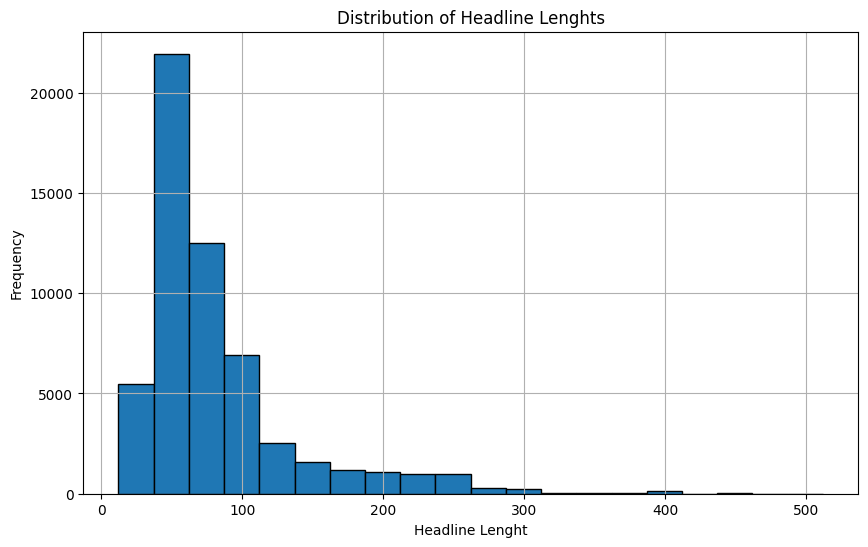

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['headline_length'].hist(bins=20, edgecolor= 'black')
plt.title('Distribution of Headline Lenghts')
plt.xlabel('Headline Lenght')
plt.ylabel('Frequency')
plt.show()

## Publisher Analysis

Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


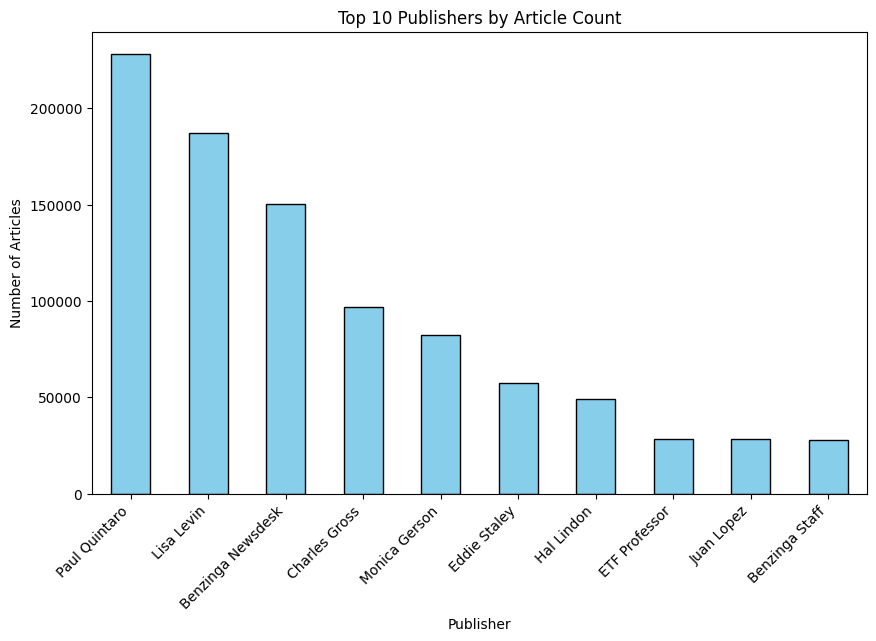

In [17]:
# Load the dataset
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from publisher_analysis import count_and_plot_publishers

# Load your dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Call the function to count and plot publishers
count_and_plot_publishers(data, column_name='publisher', top_n=10)

## Articles based on domains

In [18]:
# Load the dataset
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from email_domain_analysis import analyze_email_domains

# Load the data
file_path = r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv"
data = pd.read_csv(file_path)

# Analyze email domains
domain_counts = analyze_email_domains(data)

# Display the top 10 domains
print("Top 10 Domains by Number of Articles (from email addresses):")
print(domain_counts.head(10))

Top 10 Domains by Number of Articles (from email addresses):
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\scripts\email_domain_analysis.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: re.findall(r'@([\w\.-]+)', x)[0])


## Article Frequency Over Time

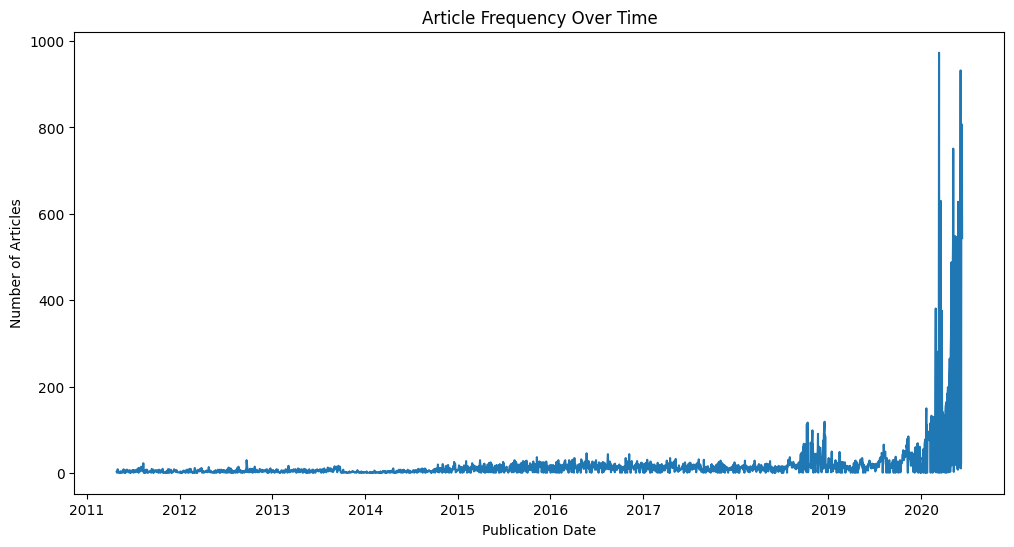

In [22]:
# Convert 'date' column to datetime with UTC timezone
data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')

# Analyze the frequency of articles over time
date_counts = data['date'].dt.date.value_counts().sort_index()

# Plot the trend over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

## Sentiment Analysis and Distribution

Sentiment analysis complete. Here are some samples:
                                            headline  polarity sentiment_label
0            Stocks That Hit 52-Week Highs On Friday       0.0         neutral
1         Stocks That Hit 52-Week Highs On Wednesday       0.0         neutral
2                      71 Biggest Movers From Friday       0.0         neutral
3       46 Stocks Moving In Friday's Mid-Day Session       0.0         neutral
4  B of A Securities Maintains Neutral on Agilent...       0.0         neutral
difference in the type of news they report based on sentiment analysis


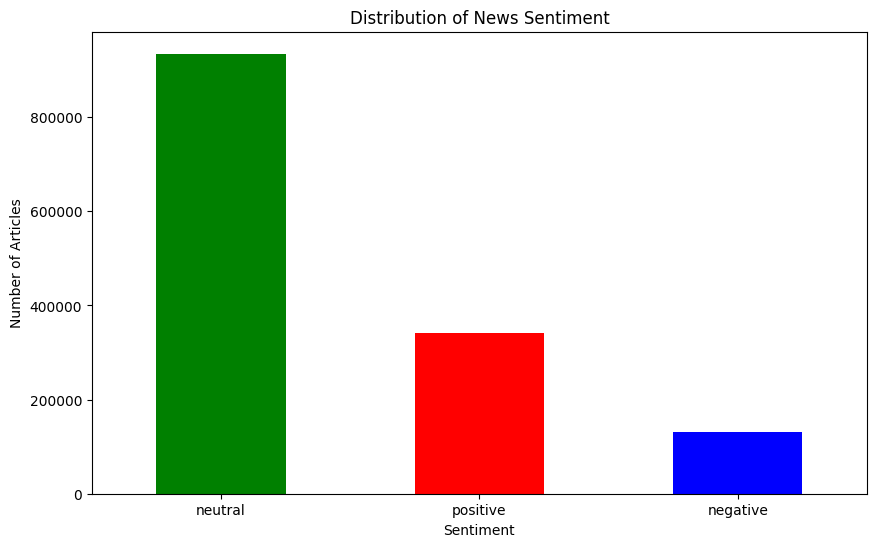

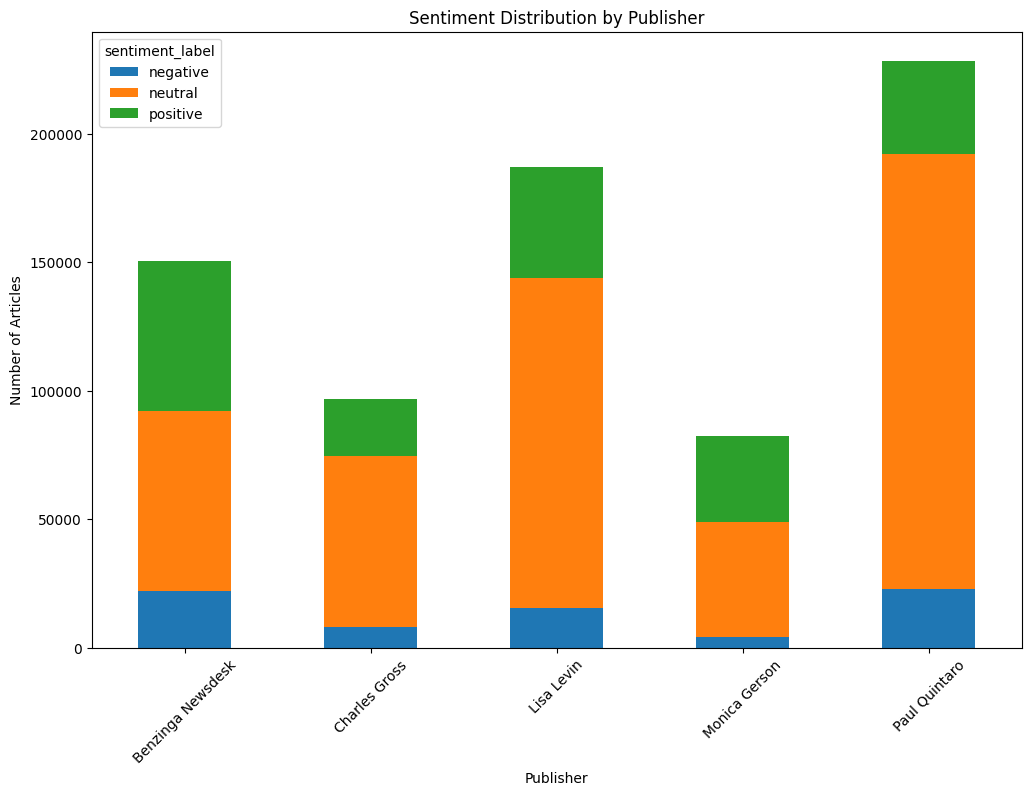

In [20]:
from textblob import TextBlob
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from visualize_sentiment_distribution import visualize_sentiment_by_publisher
from visualize_sentiment_distribution import visualize_sentiment_distribution

# Apply sentiment analysis on the 'headline' column using TextBlob
data['polarity'] = data['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment into positive, negative, or neutral based on polarity
data['sentiment_label'] = data['polarity'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)

print("Sentiment analysis complete. Here are some samples:")
print(data[['headline', 'polarity', 'sentiment_label']].head())

# Visualize the sentiment distribution
print("difference in the type of news they report based on sentiment analysis")
visualize_sentiment_distribution(data)
# Visualize sentiment distribution by top publishers
visualize_sentiment_by_publisher(data, top_n=5)

In [23]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from perform_topic_modeling_gensim import perform_topic_modeling_gensim

# Perform Topic Modeling
lda_model_gensim, corpus, id2word = perform_topic_modeling_gensim(data, num_topics=5, num_words=10, sample_size=1000)

(0, '0.043*"week" + 0.041*"52" + 0.034*"stocks" + 0.022*"upgrades" + 0.021*"new" + 0.018*"benzinga" + 0.015*"set" + 0.014*"hit" + 0.012*"high" + 0.011*"yesterday"')
(1, '0.025*"shares" + 0.017*"update" + 0.015*"estimate" + 0.014*"sales" + 0.013*"says" + 0.011*"q1" + 0.011*"eps" + 0.010*"year" + 0.010*"announces" + 0.010*"yoy"')
(2, '0.044*"stocks" + 0.041*"market" + 0.027*"session" + 0.025*"moving" + 0.023*"earnings" + 0.019*"mid" + 0.018*"pre" + 0.015*"morning" + 0.013*"tuesday" + 0.013*"scheduled"')
(3, '0.030*"trading" + 0.025*"shares" + 0.020*"higher" + 0.016*"initiates" + 0.013*"coverage" + 0.013*"update" + 0.013*"market" + 0.011*"lower" + 0.011*"stocks" + 0.010*"today"')
(4, '0.051*"vs" + 0.045*"est" + 0.034*"eps" + 0.031*"reports" + 0.022*"maintains" + 0.022*"raises" + 0.018*"target" + 0.018*"price" + 0.017*"sales" + 0.015*"buy"')


## Time Series Analysis

Original 'date' column data type and sample data:
datetime64[ns, UTC]
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]

Data type of 'date' column after conversion:
datetime64[ns, UTC]

Converted 'date' column:
0         2020-06-05 14:30:54+00:00
1         2020-06-03 14:45:20+00:00
2         2020-05-26 08:30:07+00:00
3         2020-05-22 16:45:06+00:00
4         2020-05-22 15:38:59+00:00
                     ...           
1407266   2018-01-05 15:47:36+00:00
1407267   2017-12-06 13:12:01+00:00
1407268   2017-12-06 11:04:31+00:00
1407269   2017-11-15 10:04:52+00:00
1407270   2017-11-14 17:25:57+00:00
Name: date, Length: 55987, dtype: datetime64[ns, UTC]

Data type of 'date' column after conversion:
datetime64[ns, UTC]

Sample of 'date' column after conversion:
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00


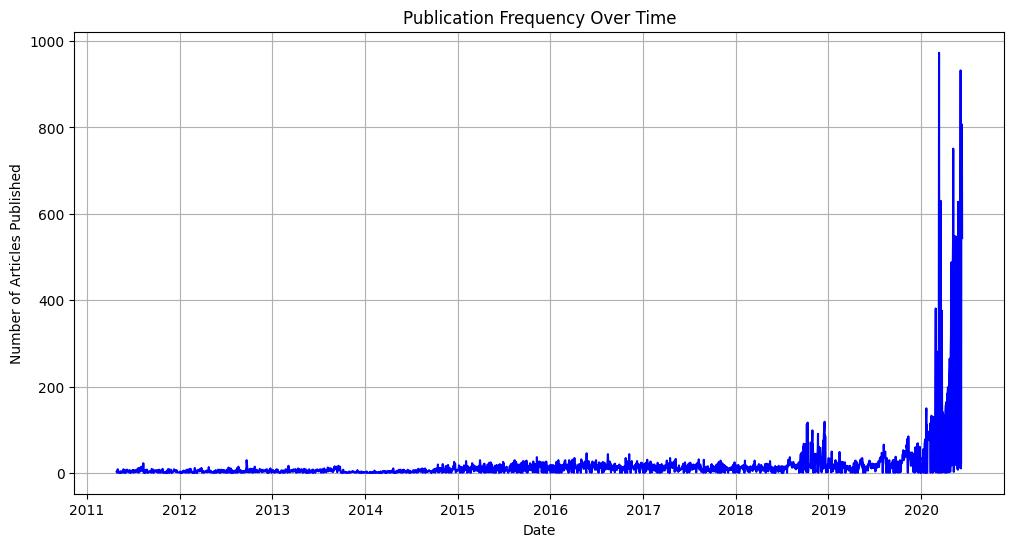

publication_date
2011-04-28      3
2011-04-29      2
2011-04-30      1
2011-05-01      1
2011-05-02      9
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: count, Length: 2502, dtype: int64


In [26]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath('../scripts'))
from analyze_publication_frequency import analyze_publication_frequency

# Load the dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Convert 'date' column to datetime with UTC timezone
data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')

# Drop rows with invalid dates (NaT values)
data = data.dropna(subset=['date'])

# Call the analyze_publication_frequency function with the cleaned data
publication_counts = analyze_publication_frequency(data)

# Print the publication counts
print(publication_counts)

In [27]:
from IPython.display import display
import sys
import os

# Add the scripts directory to the system path
sys.path.append(os.path.abspath('../scripts'))

# Import the load_stock_data function
from load_stock_data import load_stock_data

# Import the apply_technical_indicators function
from apply_technical_indicators import apply_technical_indicators

def get_all_stock_data(company_names, data_path='../data/'):
    stock_data = {}
    
    # Process each company's data
    for company in company_names:
        try:
            # Load the stock data from CSV
            file_path = os.path.join(data_path, f'{company}_historical_data.csv')
            df = load_stock_data(file_path)
            
            # Apply technical indicators to the stock data
            df = apply_technical_indicators(df)
            
            # Store the data with technical indicators
            stock_data[company] = df
        except Exception as e:
            print(f"Error loading data for {company}: {e}")
    
    return stock_data

# Define company names
company_names = ['AAPL', 'TSLA', 'AMZN', 'GOOG', 'META']

# Fetch stock data for all companies and apply technical indicators
all_stock_data = get_all_stock_data(company_names)

# Display the data for debugging
for company, data in all_stock_data.items():
    print(f"\nData for {company}:")
    display(data)


Data for AAPL:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,4.662717,6.678882,-2.016164
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,3.748082,6.092722,-2.344640
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,3.026267,5.479431,-2.453164



Data for TSLA:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,44.886918,11.789291,15.873789,-4.084498
2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,46.951389,9.353206,14.569672,-5.216466
2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,46.752165,7.302106,13.116159,-5.814053



Data for AMZN:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.8900,37.221397,-1.342010,0.635114,-1.977124
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.2020,36.132394,-1.878483,0.132395,-2.010878
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.4345,41.146719,-2.065994,-0.307283,-1.758711



Data for GOOG:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,37.434718,-0.034166,1.571016,-1.605182
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,32.279082,-1.106693,1.035474,-2.142167
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,31.843937,-1.972672,0.433845,-2.406517



Data for META:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,36.964279,-6.550694,-1.274374,-5.276320
2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,34.814669,-8.810746,-2.781648,-6.029098
2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,40.628601,-9.500635,-4.125446,-5.375189
